In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df=pd.read_csv("academic_per.csv")


In [9]:
df.head(2)


,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,female,63.0,84.0,64,84.0,2020,2
1,female,71.0,80.0,76,86.0,2018,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           13 non-null     object 
 1   math score       12 non-null     float64
 2   reading score    12 non-null     float64
 3   writing score    13 non-null     int64  
 4   placement score  11 non-null     float64
 5   club join year   13 non-null     int64  
 6   placement offer  13 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 860.0+ bytes


In [11]:
df.describe()

,math score,reading score,writing score,placement score,club join year,placement offer
count,12.000000,12.000000,13.000000,11.000000,13.000000,13.000000
mean,57.750000,82.583333,55.692308,72.818182,2019.692308,2.000000
std,50.018406,3.260182,46.894180,57.332047,1.031553,0.816497
min,-99.000000,79.000000,-99.000000,-99.000000,2018.000000,1.000000
25%,65.500000,79.750000,64.000000,84.500000,2019.000000,1.000000
50%,70.500000,82.500000,66.000000,87.000000,2020.000000,2.000000
75%,74.250000,85.250000,76.000000,95.500000,2020.000000,3.000000
max,94.000000,88.000000,79.000000,100.000000,2021.000000,3.000000


In [12]:
df.shape

(13, 7)

In [13]:
df.dtypes


gender              object
math score         float64
reading score      float64
writing score        int64
placement score    float64
club join year       int64
placement offer      int64
dtype: object

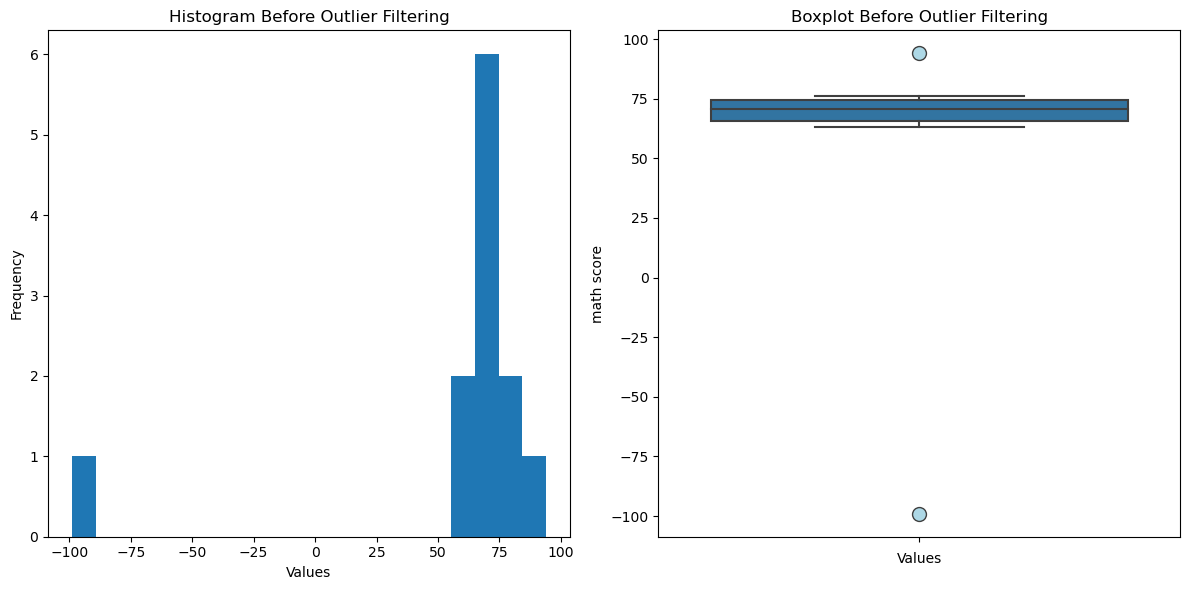

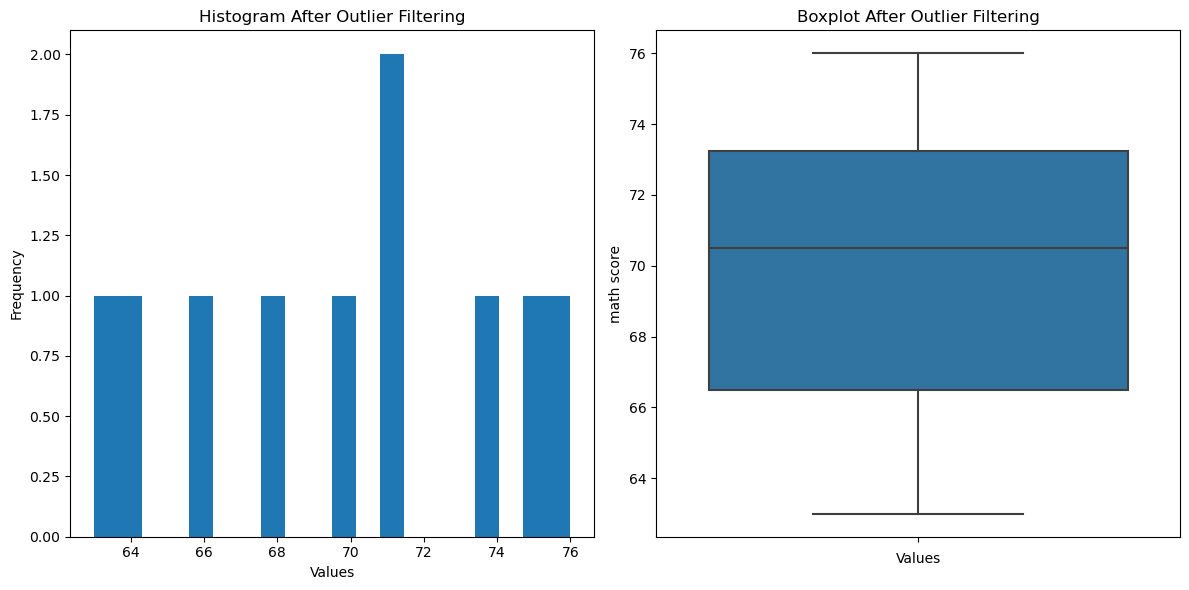

In [15]:
def plot_histogram_and_boxplot(data, column_name, title_suffix):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(data[column_name], bins=20)
    plt.title(f'Histogram {title_suffix}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column_name],
        flierprops=dict(marker='o', markerfacecolor='lightblue',markersize=10))
    plt.title(f'Boxplot {title_suffix}')
    plt.xlabel('Values')
    plt.tight_layout()
    plt.show()
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column_name] >= lower_bound) & (data[column_name] <=upper_bound)]

plot_histogram_and_boxplot(df, 'math score', 'Before Outlier Filtering')

df_filtered = remove_outliers_iqr(df, 'math score')

plot_histogram_and_boxplot(df_filtered, 'math score', 'After Outlier Filtering')

In [18]:
original_skewness = df_filtered['math score'].skew()
print("Original skewness of 'math score' variable:", original_skewness)


Original skewness of 'math score' variable: -0.17147935283741808


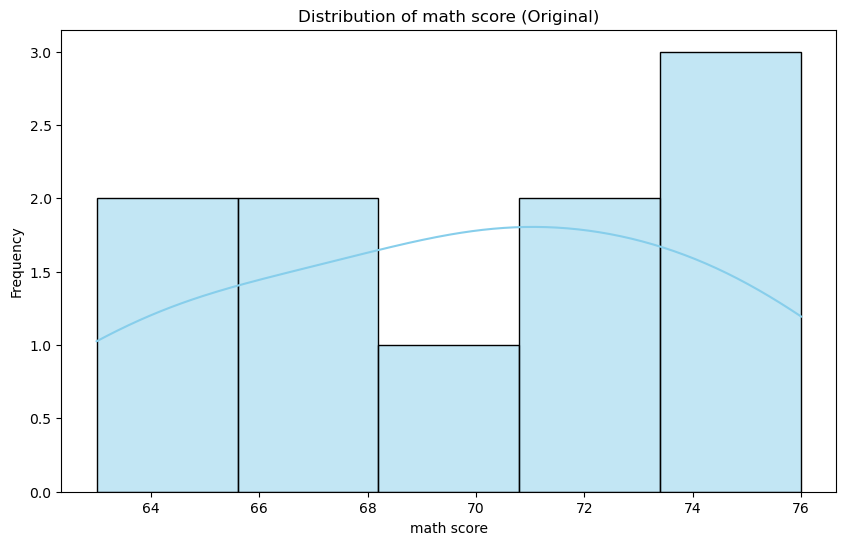

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['math score'], kde=True, color='skyblue')
plt.title('Distribution of math score (Original)')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.show()

In [24]:
df_filtered.loc['math score'] = np.sqrt(df_filtered['math score'])

transformed_skewness = df_filtered['math score'].skew()
print(f"Skewness of 'math score' variable after square root transformation:{transformed_skewness}\n\n" )

Skewness of 'math score' variable after square root transformation:-0.17147935283741808




/tmp/ipykernel_5075/1030261444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc['math score'] = np.sqrt(df_filtered['math score'])


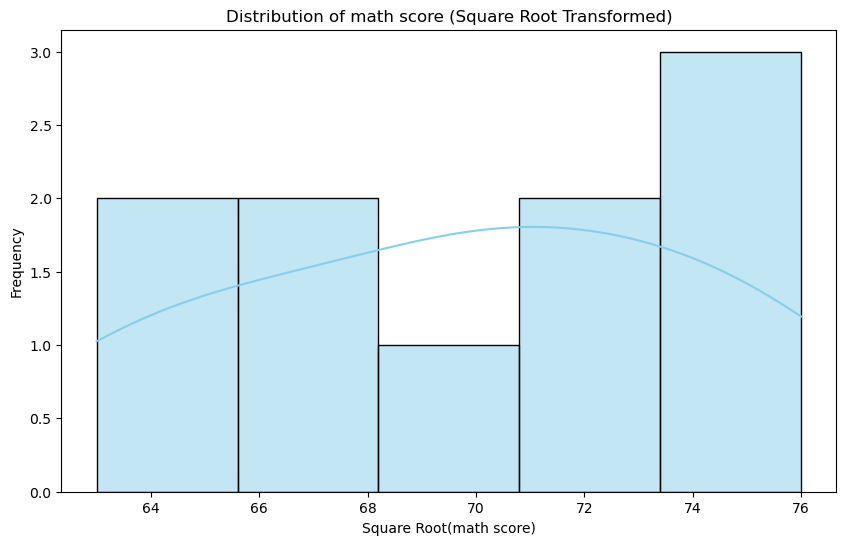

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['math score'], kde=True, color='skyblue')
plt.title('Distribution of math score (Square Root Transformed)')
plt.xlabel('Square Root(math score)')
plt.ylabel('Frequency')
plt.show()
